# Питон и машинное обучение

# Модуль 8. Линейные модели

В данном модуле мы рассмотрим другой базовый подход к решению задач машинного обучения с учителем, который предусматривает построение гиперплоскостей, разделяющих пространства признаков. 

Этот класс моделей называется __линейные модели__, они используются как в задачах классификации, так и регрессии. Несмотря на одинаковую суть, они различаются способами формирования этих гиперплоскостей.

- Алгоритмы обучения линейный моделей в задачах классификации:
    - Линейная регрессия
    - Логистическая регрессия
    - "Механизм опорных векторов", SVM
- Применение линейных моделей в задачах регрессии
- Регуляризация линейных моделей
- Особенности препроцессинга данных для их использования в линейных моделях.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

## Линейная регрессия

Если пространство признаков может быть разделено гиперплоскостью на две части, в каждой из которых прогнозируется одно из двух значений целевого класса, то такая выборка называется __линейно разделимой__. 

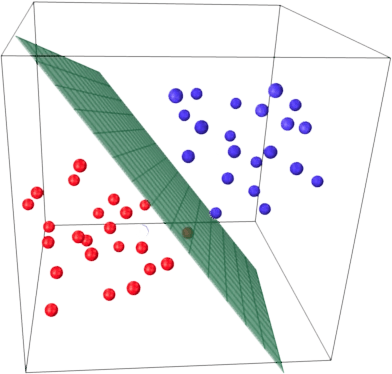

Рассмотрим на примере для двумерного пространства:


In [ ]:
np.random.seed(20240406)
n_samples = 100

# первый класс
train_data = np.random.normal(size=(n_samples, 2), loc=-1)
train_labels = np.zeros(n_samples)

# второй класс
train_data = np.r_[train_data, np.random.normal(size=(n_samples, 2), loc=1)]
train_labels = np.r_[train_labels, np.ones(n_samples)]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

train_data = StandardScaler().fit_transform(train_data)

In [ ]:
from plotting import plot_decision_regions

fig, ax = plt.subplots( figsize=(6,6) )

plot_decision_regions(train_data, train_labels)

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression(fit_intercept=False)

linear.fit(train_data, train_labels)

fig, ax = plt.subplots( figsize=(6,6) )

plot_decision_regions(train_data, train_labels, linear)
plt.title("Linear model with w1={:.4f}, w2={:.4f}, b={:.4f}".format(*linear.coef_, linear.intercept_))
plt.show()

Как это работает?

Уравнение прямой: $\Large y = k*x + b$ или 

$\Large k*x + b - y = 0$

Уравнение гиперплоскости в $n$-мерном пространстве: $\large \sum_{i=1}^n w_i x_{i} + b = 0$, при этом коэффициенты  $w_i$ - не что иное, как __координаты вектора нормали__ к плоскости. Можно добавить фиктивное измерение $x_0 = 1$ (тогда параметр $b$ станет смещением $w_0$) и переписать уравнение гиперплоскости в следующем виде:

$\large \sum_{i=0}^n w_i x_{i} = 0$

В качестве признака принадлежности точки к тому или иному классу можно взять расстояние (а точнее, знак расстояния) от точки до плоскости. 

Модуль расстояния при этом можно использовать для оценки вероятности: чем дальше точка от плоскости, тем больше вероятность ее принадлежности к соответствующему классу (__логистическая регрессия__ - она как раз об этом).

Расстояние вычисляется как скалярное произведение вектора весов модели $\overrightarrow{w}$ на радиус-вектор для заданной точки $\overrightarrow{x}$:

$\Large dist = \sum_{i=0}^n w_i x_{i} =  \overrightarrow{w}^T \overrightarrow{x} $

Для вычисления оптимальных весов алгоритм минимизирует значение __функции потерь__. В случае линейной регрессии используется среднеквадратичная ошибка:

$\Large MSE = \frac{1}{n} * \sum_{i=0}^n{(y_i - \overrightarrow{w}^T \overrightarrow{x_i})^2}$

Как несложно убедиться, функция зависит от $y$ (эталонное значение класса), $\overrightarrow{x}$ (значений определяющих признаков), и вектора весов $\overrightarrow{w}$. Именно значения в векторе весов и подлежат оптимизации. 

В данном (линейном) случае функция потерь дифференцируется по весам модели (вычисляется градиент), и затем решаются уравнения для значений градиента равных нулю. Для матрицы наблюдений $\textbf{X}$, после ряда математических выкладок получается следующая система уравнений, записанная в векторном виде:

$\Large \overrightarrow{\textbf{w}} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \overrightarrow{\textbf{y}}$


Более подробно о математических основах линейной регрессии можно прочитать [здесь](https://habr.com/ru/companies/ods/articles/323890/).

In [ ]:
x_1 = np.array([2,2])
x_2 = np.array([-2,-2])

fig, ax = plt.subplots( figsize=(6,6) )

plot_decision_regions(train_data, train_labels, linear, label_y=None)
plt.title("Linear model with w1={:.4f}, w2={:.4f}, b={:.4f}".format(*linear.coef_, linear.intercept_))

plt.scatter(*x_1, s=100, color='r', edgecolor='black', linewidth=1, 
            label="({}, {}), pred={:.4f}, dist={:.4f}".format(*x_1,
                                                  *linear.predict([x_1]),
                                                 np.dot(x_1, linear.coef_) ))
plt.scatter(*x_2, s=100, color='r', edgecolor='black', linewidth=1, 
            label="({}, {}), pred={:.4f}, dist={:.4f}".format(*x_2, 
                                                  *linear.predict([x_2]),
                                                 np.dot(x_2, linear.coef_)))

x = np.linspace(-3, 3, 20)
def f(x, coef, intercept):
    return -1 * (x * coef[0] + intercept) / coef[1] 

plt.plot(x, f(x, linear.coef_, linear.intercept_), "r:", linewidth=4, label="Linear Model")

plt.legend()

plt.show()

## Ridge (L2) - регуляризация

Приведенная выше система уравнений может не иметь решений, если есть линейная зависимость между данными. Тогда матрица $\textbf{X}^{\text{T}} \textbf{X}$ становится сингулярной или вырожденной, и получить обратную матрицу для нее не представляется возможным. Наша задача сделать ее невырожденной или __регулярной__, и поэтому этот процесс называется __регуляризацией__.

Добавим в систему уравнений регуляризирующий член:

$\Large \overrightarrow{\textbf{w}} = \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda E\right)^{-1} \textbf{X}^{\text{T}} \overrightarrow{\textbf{y}}$

Здесь $\lambda$ - это регуляризующий коэффициент, а $E$ - единичная диагональная матрица (где на главной диагонали только 1).

Суть Ridge-регуляризации на рисунке:
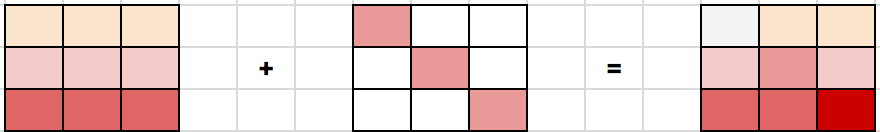

Как это работает, посмотрим на следующем примере:


In [ ]:
def f(x, std=0.5):
    y = 10 - (x*5 - 2)**2
    return np.random.normal(y, std) if std > 0 else y

def make_data(N=40, error=1.0, random_seed=1):
    np.random.seed(random_seed)
    X = np.sort(np.random.random(N))[:, np.newaxis]
    y = f(X.ravel(), error)
    
    return X, y

X, y = make_data(40, error=1)


x = np.linspace(0, 1.2, 100)
real_y = [f(i, 0) for i in x]

fig, ax = plt.subplots()
ax.set_ylim( (-3, 14) )
ax.scatter(X.ravel(), y, color='r', label="X")
ax.plot(x, real_y, 'k--', label="Correct y")
ax.legend()
plt.show()

In [ ]:
np.round(X[:5], 3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree=20

polyfeat = PolynomialFeatures(degree=degree)

X_poly = polyfeat.fit_transform(X)
print(X_poly.shape)
X_poly[:5, :4]

In [ ]:
from sklearn.linear_model import Ridge

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

alpha = .01

r_model = Ridge(alpha=alpha)
r_model.fit(X_poly, y)

y_test = r_model.predict(polyfeat.fit_transform(X_test))

fig, ax = plt.subplots()
ax.set_ylim( (-3, 14) )
ax.plot(X_test.ravel(), y_test, label=f"Ridge, a={alpha}")
ax.plot(x, real_y, 'k--', label="Correct y")
ax.scatter(X.ravel(), y, color='r', label="X")
ax.legend()
ax.set_title(f"Ridge regression, degree={degree}, R2: {r2_score(r_model.predict(polyfeat.fit_transform(X)), y):.3g}")

plt.show()

Если представить коэффициент $\alpha$ как член функции потерь, для Ridge-регрессии его можно представить следующим образом:

$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$

Rigde регуляризацию также называют $L2$ - регуляризацией.

## Lasso (L1) - регуляризация

В случае с Lasso мы имеем дело не с суммой квадратов весов, а с их модулями:

$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$

Поэтому Lasso регуляризацию также называют $L1$ - регуляризацией.

In [ ]:
from sklearn.linear_model import Lasso

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

alpha = .01

l_model = Lasso(alpha=alpha)
l_model.fit(X_poly, y)

y_test = l_model.predict(polyfeat.fit_transform(X_test))

fig, ax = plt.subplots()
ax.set_ylim( (-3, 14) )
ax.plot(X_test.ravel(), y_test, label=f"Lasso, a={alpha}")
ax.plot(x, real_y, 'k--', label="Correct y")
ax.scatter(X.ravel(), y, color='r', label="X")
ax.legend()
ax.set_title(f"Lasso regression, degree={degree}, R2: {r2_score(l_model.predict(polyfeat.fit_transform(X)), y):.3g}")

plt.show()

#### Отбор признаков средствами Lasso-регрессии

In [ ]:
l_model.coef_

In [ ]:
from cycler import cycler

n_alphas = 200
alphas = np.linspace(0.1, 1, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_poly, y)
    coefs.append(model.coef_[:7])

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs, label=[f"d={i}" for i in range(7)])
# ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.legend()
plt.show()

## Логистическая регрессия

Логистическая регрессия является частным случаем линейного классификатора, но в отличие от него она предсказывает не бинарный признак принадлежности к классу, а вероятность.

Это реализовано благодаря применению сигмоидной функции к вычисленному расстоянию до разделяющей поверхности.

Алгоритм логистической регрессии работает следующим образом:

**Шаг 1.** Вычислить значение $\Large w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \bar{w}\bar{x}$ граничной функции (она задает разделяющую гиперплоскость).

**Шаг 2.** Вычислить логарифм отношения шансов: $\Large log(OR_{+}) = \bar{w}\bar{x}$.

**Шаг 3.** Имея $OR_{+}$, вычислить $P_{+}$ с помощью простой зависимости.

$\Large P_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\bar{w}\bar{x}}}{1 + \exp^{\bar{w}\bar{x}}} =  \frac{1}{1 + \exp^{-\bar{w}\bar{x}}} = \sigma(\bar{w}\bar{x})$

Это и есть сигмоидная функция. Ее график выглядит следующим образом:

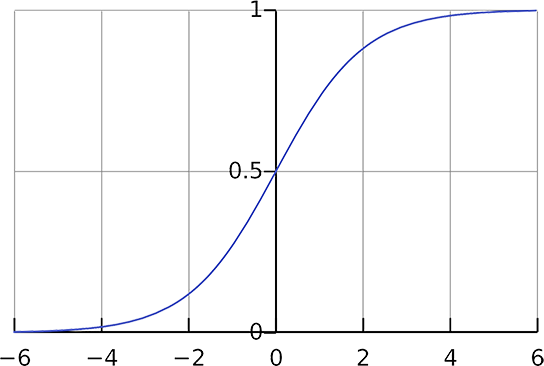

Снова сгенерируем данные:

In [ ]:
np.random.seed(20240406)
n_samples = 100

# первый класс
train_data = np.random.normal(size=(n_samples, 2), loc=-1)
train_labels = np.zeros(n_samples)

# второй класс
train_data = np.r_[train_data, np.random.normal(size=(n_samples, 2), loc=1)]
train_labels = np.r_[train_labels, np.ones(n_samples)]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

train_data = StandardScaler().fit_transform(train_data)

In [ ]:
from plotting import plot_decision_regions

fig, ax = plt.subplots( figsize=(6,6) )

plot_decision_regions(train_data, train_labels)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(train_data, train_labels)

fig, ax = plt.subplots( figsize=(6,6) )

plot_decision_regions(train_data, train_labels, logit)
plt.title("Logit model")
plt.show()

#### ⁉️ Задание

Для датасета "voice.csv" обучите модель "Логистическая регрессия", сделайте оценку Accuracy.

In [ ]:
# ваш код здесь



У модели "Логистическая регрессия" есть параметр L2-регуляризации ```C```, который соответствует обратной величине коэффициента ```alpha```:

$\Large C = \frac{1}{\alpha}$

#### ⁉️ Задание

Для датасета "voice.csv", варьируя параметр регуляризации C, постройте валидационную кривую модели ```LogitsicRegression```.

In [ ]:
# ваш код здесь



## SVM (Механизм Опорных Векторов)

Support Vector Machine - это еще один способ обучения линейных моделей. Как он работает - см. ниже.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50, n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=1, random_state=0)
x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

plt.figure(figsize=(7,7))

plot_decision_regions(X, y)

for a, b, w in [(-0.1, 0.09, 0.3), (0.05, 0.03, 0.2), (-0.3, 0.15, 0.4)]:
    y_line = a * x_line + b
    plt.plot(x_line, y_line, '-k')
    plt.fill_between(x_line, y_line - w, y_line + w, edgecolor='none', color='k', alpha=0.1)
plt.xlim(x_line[0], x_line[-1])
plt.show()

In [ ]:
from sklearn.svm import SVC

# Fitting linear SVM model
lin_svm = SVC(kernel='linear', C=10)
lin_svm.fit(X, y)

plt.figure(figsize=(7,7))

for support_vector in lin_svm.support_vectors_:
    plt.scatter(*support_vector, s=200, color='#fff', edgecolor='black', linewidth=1,
               label='[{:.4f}, {:.4f}]'.format(*support_vector))
            
plot_decision_regions(X, y, lin_svm, label_y=None)

plt.legend()

plt.show()

In [ ]:
np.random.seed(20240406)
n_samples = 100

# первый класс
train_data = np.random.normal(size=(n_samples, 2), loc=-1)
train_labels = np.zeros(n_samples)

# второй класс
train_data = np.r_[train_data, np.random.normal(size=(n_samples, 2), loc=1)]
train_labels = np.r_[train_labels, np.ones(n_samples)]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

train_data = StandardScaler().fit_transform(train_data)

lin_svm = SVC(kernel='linear', C=10)
lin_svm.fit(train_data, train_labels)

plt.figure(figsize=(7,7))

for support_vector in lin_svm.support_vectors_:
    plt.scatter(*support_vector, s=200, color='#fff', edgecolor='black', linewidth=1)
            
plot_decision_regions(train_data, train_labels, lin_svm, label_y=None)

plt.show()

Теперь посмотрим, какие возможности нам предоставляет SVM для работы с линейно неразделимыми множествами данных. Например, такими:

In [ ]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=100, factor=0.2, 
                    noise=0.1, random_state=0)

plt.figure(figsize=(7,7))

plot_decision_regions(X, y)

plt.show()

В таком случае при работе с линейными моделями можно добиться разделения пространства, добавив новый признак, который соответствует, например, сумме квадратов таких признаков:

In [ ]:
from ipywidgets import interact
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

r = X[:, 0] ** 2 + X[:, 1] ** 2

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(10,7))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=70, cmap=ListedColormap( ['b', 'g'] ))
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180));

SVM, в силу своих особенностей, предоставляет возможность работы с такими данными через __полиномиальное ядро__.

In [ ]:
poly_svm = SVC(kernel='poly', degree=2).fit(X, y)

plt.figure(figsize=(7,7))

plot_decision_regions(X, y, poly_svm)

plt.show()

Также в SVM реализовано __RBF-ядро__, которое позволяет строить достаточно сложные ограничивающие поверхности. Параметром регуляризации здесь выступает ```gamma```. 

Создадим более зашумленные данные и попробуем в интерактивном режиме регулировать значение данного параметра:

In [ ]:
def plot_svm(N=100, gamma=0.0):
    X, y = make_circles(n_samples=200, factor=0.1, 
                        noise=0.2, random_state=0)
    X, y = X[:N], y[:N]
    rbf_svm = SVC(kernel='rbf', gamma=0.1**gamma).fit(X, y)
    
    plt.figure(figsize=(8,8))
    
    plot_decision_regions(X, y, rbf_svm)
    
interact(plot_svm, N=(10, 200), gamma=(-3.0, 1.0));

#### ⁉️ Задание

1. Для датасета "Качество микросхем":
- обучите модель ```LogisticRegression```
- обучите модель ```SVM```
- обучите модель ```XGBoost```

Для каждой модели:
- получите лучшее значение метрики
- визуализируйте разделяющие поверхности на плоскости
- сравните результаты, сделайте выводы.


In [ ]:
data = pd.read_csv(
    "data/microchip_tests.txt", header=None, names=("test1", "test2", "released")
)
data

In [ ]:
# ваш код здесь

